In [1]:
conda install -c conda-forge/label/gcc7 missingno


Solving environment: done

## Package Plan ##

  environment location: /home/meme/anaconda3

  added / updated specs:
    - missingno


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    missingno-0.4.1            |             py_0          10 KB  conda-forge/label/gcc7
    ------------------------------------------------------------
                                           Total:          10 KB

The following NEW packages will be INSTALLED:

  missingno          conda-forge/label/gcc7/noarch::missingno-0.4.1-py_0



missingno-0.4.1      | 10 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import missingno as msno
%matplotlib inline

In [6]:
path = 'novel-corona-virus-2019-dataset/2019_nCoV_data.csv'
df = pd.read_csv(path)
df.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1719 entries, 0 to 1718
Data columns (total 8 columns):
Sno               1719 non-null int64
Date              1719 non-null object
Province/State    1257 non-null object
Country           1719 non-null object
Last Update       1719 non-null object
Confirmed         1719 non-null float64
Deaths            1719 non-null float64
Recovered         1719 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 107.6+ KB


In [8]:
df.shape

(1719, 8)

In [9]:
df.shape[0]

1719

In [10]:
df.shape[1]

8

In [11]:
df.columns.values.tolist()

['Sno',
 'Date',
 'Province/State',
 'Country',
 'Last Update',
 'Confirmed',
 'Deaths',
 'Recovered']

In [12]:
df.dtypes

Sno                 int64
Date               object
Province/State     object
Country            object
Last Update        object
Confirmed         float64
Deaths            float64
Recovered         float64
dtype: object

In [13]:
df.isnull().any().any()

True

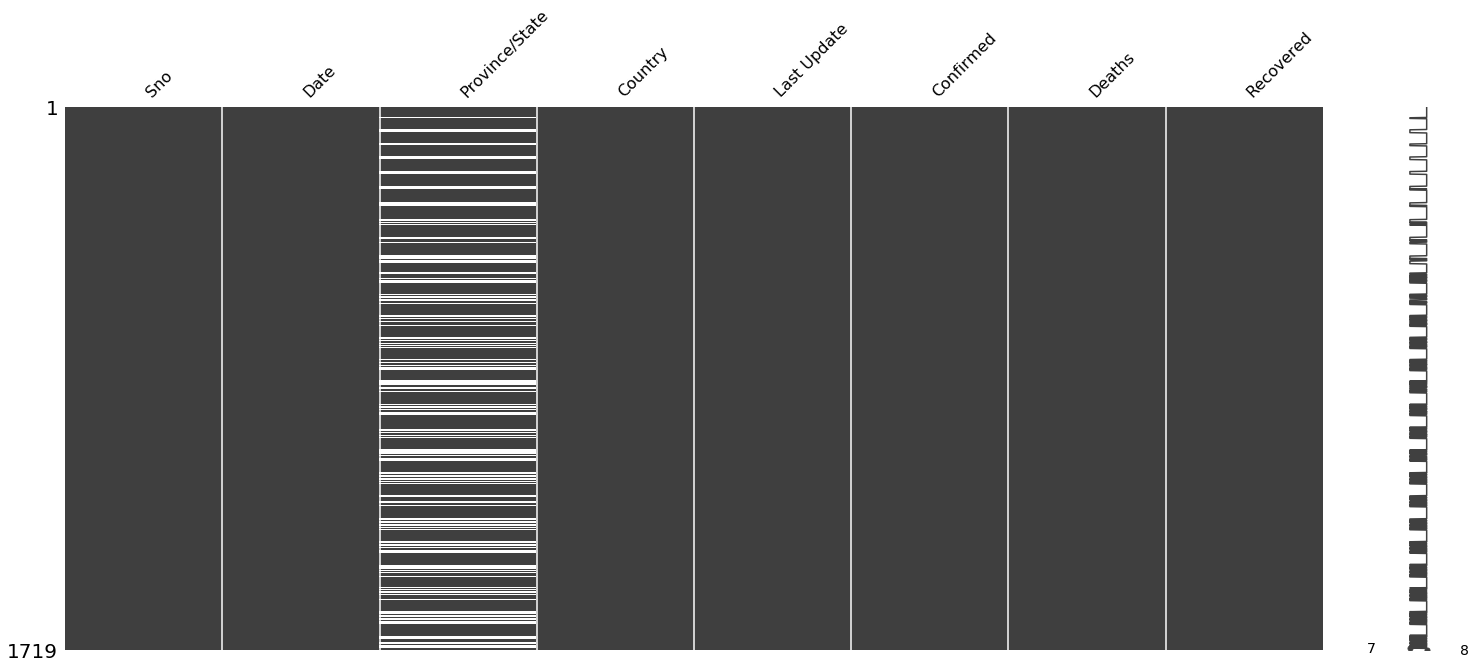

In [14]:
msno.matrix(df)


In [16]:
df.replace({' ': np.nan}, inplace=True)

In [17]:
df.isnull().any().any()

True

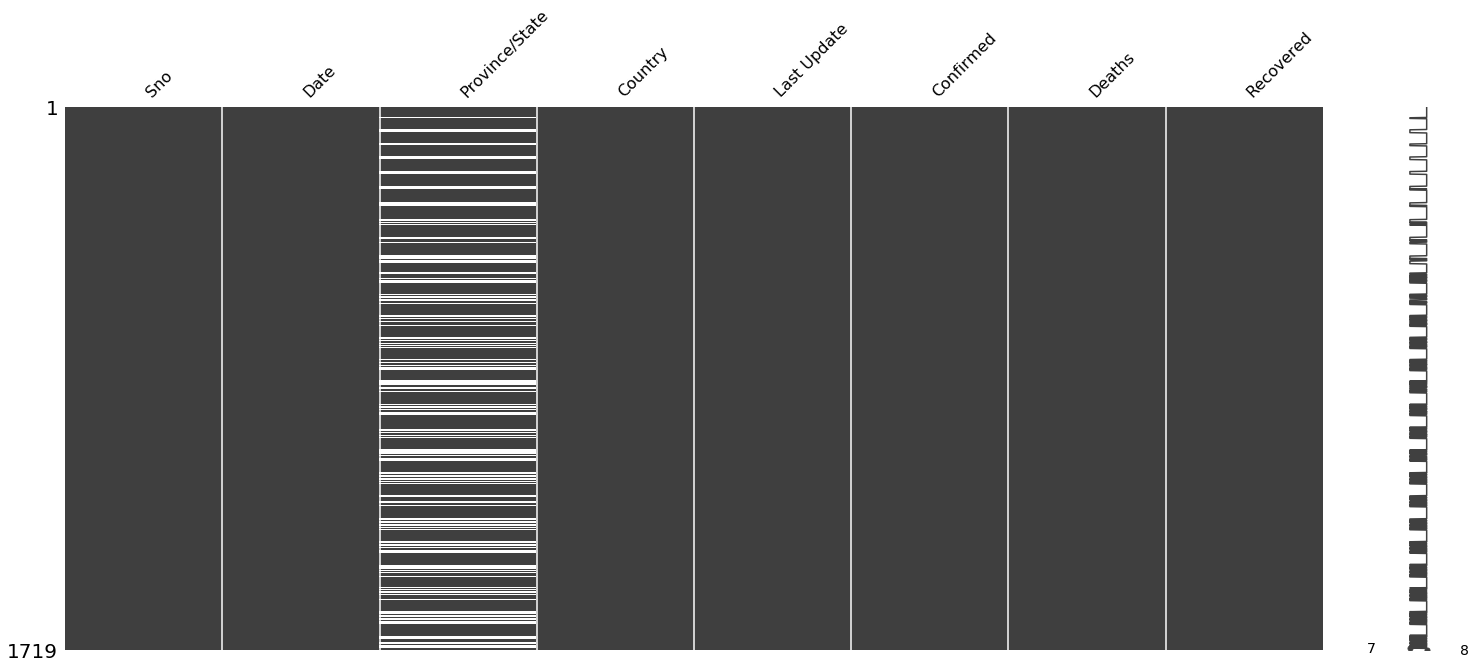

In [18]:
msno.matrix(df)

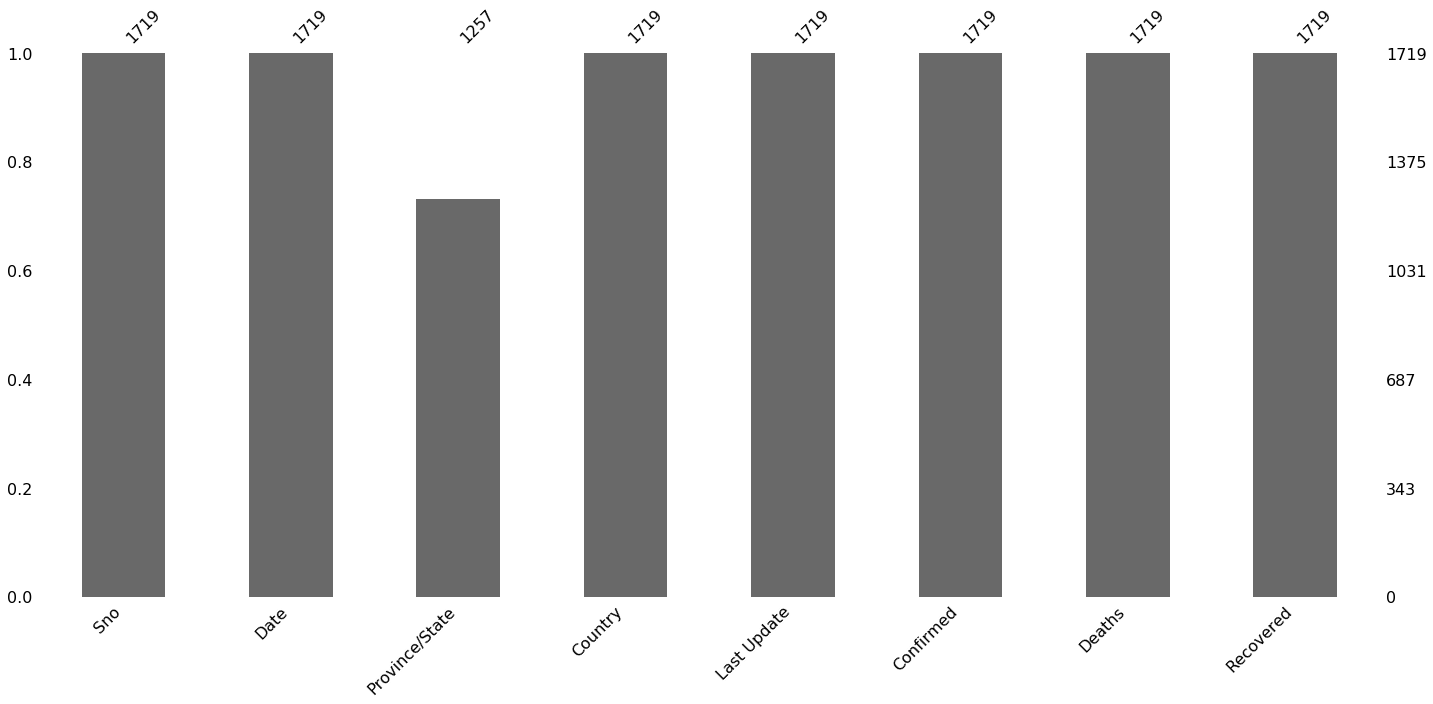

In [19]:
msno.bar(df)


In [20]:
df.columns[df.isnull().any()].tolist()

['Province/State']

In [21]:
df.describe()

,Sno,Confirmed,Deaths,Recovered
count,1719.000000,1719.000000,1719.000000,1719.000000
mean,860.000000,454.596859,10.441536,44.361838
std,496.376873,3712.529032,106.638286,351.078713
min,1.000000,0.000000,0.000000,0.000000
25%,430.500000,2.000000,0.000000,0.000000
50%,860.000000,12.000000,0.000000,0.000000
75%,1289.500000,109.000000,0.000000,7.000000
max,1719.000000,59989.000000,1789.000000,7862.000000


In [22]:
df.loc[[0]]

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0


In [23]:
df.loc[30:33]

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
30,31,01/22/2020 12:00:00,Tibet,China,01/22/2020 12:00:00,0.0,0.0,0.0
31,32,01/22/2020 12:00:00,Washington,US,01/22/2020 12:00:00,1.0,0.0,0.0
32,33,01/22/2020 12:00:00,Xinjiang,China,01/22/2020 12:00:00,0.0,0.0,0.0
33,34,01/22/2020 12:00:00,Yunnan,China,01/22/2020 12:00:00,1.0,0.0,0.0


In [24]:
df.drop([0,24,51], axis=0).head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0
5,6,01/22/2020 12:00:00,Guangdong,China,01/22/2020 12:00:00,26.0,0.0,0.0


In [25]:
df.drop(df.index[1:5], axis=0).head(10)

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
5,6,01/22/2020 12:00:00,Guangdong,China,01/22/2020 12:00:00,26.0,0.0,0.0
6,7,01/22/2020 12:00:00,Guangxi,China,01/22/2020 12:00:00,2.0,0.0,0.0
7,8,01/22/2020 12:00:00,Guizhou,China,01/22/2020 12:00:00,1.0,0.0,0.0
8,9,01/22/2020 12:00:00,Hainan,China,01/22/2020 12:00:00,4.0,0.0,0.0
9,10,01/22/2020 12:00:00,Hebei,China,01/22/2020 12:00:00,1.0,0.0,0.0
10,11,01/22/2020 12:00:00,Heilongjiang,China,01/22/2020 12:00:00,0.0,0.0,0.0
11,12,01/22/2020 12:00:00,Henan,China,01/22/2020 12:00:00,5.0,0.0,0.0
12,13,01/22/2020 12:00:00,Hong Kong,China,01/22/2020 12:00:00,0.0,0.0,0.0
13,14,01/22/2020 12:00:00,Hubei,China,01/22/2020 12:00:00,444.0,0.0,0.0


In [26]:
df[100:].head() 

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
100,101,01/24/2020 12:00:00,Yunnan,Mainland China,01/24/2020 12:00:00,5.0,0.0,0.0
101,102,01/24/2020 12:00:00,Shaanxi,Mainland China,01/24/2020 12:00:00,5.0,0.0,0.0
102,103,01/24/2020 12:00:00,Heilongjiang,Mainland China,01/24/2020 12:00:00,4.0,1.0,0.0
103,104,01/24/2020 12:00:00,Liaoning,Mainland China,01/24/2020 12:00:00,4.0,0.0,0.0
104,105,01/24/2020 12:00:00,Guizhou,Mainland China,01/24/2020 12:00:00,3.0,0.0,0.0


In [28]:
df.Deaths.values

array([0., 0., 0., ..., 0., 0., 0.])

In [30]:
df['Deaths'].values

array([0., 0., 0., ..., 0., 0., 0.])

In [31]:
df.Deaths.unique()

array([0.000e+00, 1.000e+00, 1.700e+01, 2.400e+01, 5.200e+01, 7.600e+01,
       1.000e+02, 1.250e+02, 2.000e+00, 1.620e+02, 2.040e+02, 2.490e+02,
       2.940e+02, 3.500e+02, 4.140e+02, 4.790e+02, 6.180e+02, 3.000e+00,
       7.800e+02, 6.000e+00, 8.710e+02, 7.000e+00, 9.740e+02, 1.068e+03,
       8.000e+00, 4.000e+00, 1.310e+03, 1.000e+01, 5.000e+00, 9.000e+00,
       1.426e+03, 1.100e+01, 1.457e+03, 1.596e+03, 1.300e+01, 1.696e+03,
       1.789e+03, 1.600e+01])

In [32]:
df.Deaths.value_counts()

0.0       1351
1.0        203
2.0         68
3.0         29
4.0         12
6.0          9
11.0         7
5.0          5
7.0          2
8.0          2
479.0        2
13.0         2
618.0        2
350.0        1
974.0        1
17.0         1
24.0         1
52.0         1
76.0         1
100.0        1
294.0        1
204.0        1
1596.0       1
162.0        1
1068.0       1
414.0        1
10.0         1
871.0        1
9.0          1
1310.0       1
780.0        1
1696.0       1
16.0         1
1426.0       1
1789.0       1
1457.0       1
249.0        1
125.0        1
Name: Deaths, dtype: int64

In [33]:
df.agg(['count', 'size', 'nunique'])

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
count,1719,1719,1257,1719,1719,1719,1719,1719
size,1719,1719,1719,1719,1719,1719,1719,1719
nunique,1719,27,61,34,520,397,38,175


In [35]:
df.groupby('Deaths').agg(['count', 'size', 'nunique']).stack()

Sno  Date  Province/State  Country  Last Update  Confirmed  \
Deaths                                                                        
0.0    count    1351  1351             914     1351         1351       1351   
       size     1351  1351            1351     1351         1351       1351   
       nunique  1351    27              61       34          361        228   
1.0    count     203   203             178      203          203        203   
       size      203   203             203      203          203        203   
...              ...   ...             ...      ...          ...        ...   
1696.0 size        1     1               1        1            1          1   
       nunique     1     1               1        1            1          1   
1789.0 count       1     1               1        1            1          1   
       size        1     1               1        1            1          1   
       nunique     1     1               1        1            1          1   

                Recovered  
Deaths                     
0.0    count         1351  
       size          1351  
       nunique         78  
1.0    count          203  
       size           203  
...                   ...  
1696.0 size             1  
       nunique          1  
1789.0 count            1  
       size             1  
       nunique          1  

[114 rows x 7 columns]

In [36]:
df.groupby('Deaths').agg(['count', 'size', 'nunique'])

Sno                Date               Province/State                \
       count  size nunique count  size nunique          count  size nunique   
Deaths                                                                        
0.0     1351  1351    1351  1351  1351      27            914  1351      61   
1.0      203   203     203   203   203      26            178   203      23   
2.0       68    68      68    68    68      21             68    68      12   
3.0       29    29      29    29    29      11             29    29      10   
4.0       12    12      12    12    12       7             12    12       5   
5.0        5     5       5     5     5       5              5     5       2   
6.0        9     9       9     9     9       8              9     9       3   
7.0        2     2       2     2     2       2              2     2       1   
8.0        2     2       2     2     2       1              2     2       2   
9.0        1     1       1     1     1       1              1     1       1   
10.0       1     1       1     1     1       1              1     1       1   
11.0       7     7       7     7     7       5              7     7       2   
13.0       2     2       2     2     2       2              2     2       1   
16.0       1     1       1     1     1       1              1     1       1   
17.0       1     1       1     1     1       1              1     1       1   
24.0       1     1       1     1     1       1              1     1       1   
52.0       1     1       1     1     1       1              1     1       1   
76.0       1     1       1     1     1       1              1     1       1   
100.0      1     1       1     1     1       1              1     1       1   
125.0      1     1       1     1     1       1              1     1       1   
162.0      1     1       1     1     1       1              1     1       1   
204.0      1     1       1     1     1       1              1     1       1   
249.0      1     1       1     1     1       1              1     1       1   
294.0      1     1       1     1     1       1              1     1       1   
350.0      1     1       1     1     1       1              1     1       1   
414.0      1     1       1     1     1       1              1     1       1   
479.0      2     2       2     2     2       2              2     2       1   
618.0      2     2       2     2     2       2              2     2       1   
780.0      1     1       1     1     1       1              1     1       1   
871.0      1     1       1     1     1       1              1     1       1   
974.0      1     1       1     1     1       1              1     1       1   
1068.0     1     1       1     1     1       1              1     1       1   
1310.0     1     1       1     1     1       1              1     1       1   
1426.0     1     1       1     1     1       1              1     1       1   
1457.0     1     1       1     1     1       1              1     1       1   
1596.0     1     1       1     1     1       1              1     1       1   
1696.0     1     1       1     1     1       1              1     1       1   
1789.0     1     1       1     1     1       1              1     1       1   

       Country  ...         Last Update               Confirmed                \
         count  ... nunique       count  size nunique     count  size nunique   
Deaths          ...                                                             
0.0       1351  ...      34        1351  1351     361      1351  1351     228   
1.0        203  ...       6         203   203     141       203   203     139   
2.0         68  ...       1          68    68      61        68    68      52   
3.0         29  ...       1          29    29      28        29    29      26   
4.0         12  ...       1          12    12      12        12    12      11   
5.0          5  ...       1           5     5       5         5     5       5   
6.0          9  ...       1           9 

In [37]:
df_sample = df.sample(frac=0.05, random_state=1)
df_sample.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
1677,1678,02/17/2020 22:00:00,NaN,Thailand,2020-02-17T07:33:02,35.0,0.0,15.0
1473,1474,02/14/2020 22:00:00,NaN,Spain,2020-02-09T20:33:03,2.0,0.0,0.0
1166,1167,02/10/2020 19:30:00,NaN,Vietnam,2020-02-10 03:03:09,14.0,0.0,1.0
202,203,01/26/2020 23:00:00,Illinois,US,01/26/2020 23:00:00,1.0,0.0,0.0
366,367,01/29/2020 21:00:00,British Columbia,Canada,01/29/2020 21:00:00,1.0,0.0,0.0


In [38]:
df.shape

(1719, 8)

In [39]:
df_sample.shape

(86, 8)

In [41]:
df_dropped = df.dropna(subset=['Confirmed'])
df_dropped.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0


In [42]:
df_dropped.shape

(1719, 8)

In [43]:
df_copy = df.copy()
df_copy.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0


In [44]:
df_copy.shape

(1719, 8)

In [47]:
df_dropped['Confirmed'].dtype

dtype('float64')

In [48]:
df_dropped['Confirmed'].mean() 

454.59685863874347

In [49]:
df_copy['Confirmed'].fillna(value=np.round(df['Confirmed'].mean(),decimals=0), inplace=True)

In [50]:
df_copy.agg(['count', 'size', 'nunique'])

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
count,1719,1719,1257,1719,1719,1719,1719,1719
size,1719,1719,1719,1719,1719,1719,1719,1719
nunique,1719,27,61,34,520,397,38,175


In [52]:
list(df['Country'].unique())

['China',
 'US',
 'Japan',
 'Thailand',
 'South Korea',
 'Mainland China',
 'Hong Kong',
 'Macau',
 'Taiwan',
 'Singapore',
 'Philippines',
 'Malaysia',
 'Vietnam',
 'Australia',
 'Mexico',
 'Brazil',
 'France',
 'Nepal',
 'Canada',
 'Cambodia',
 'Sri Lanka',
 'Ivory Coast',
 'Germany',
 'Finland',
 'United Arab Emirates',
 'India',
 'Italy',
 'Sweden',
 'Russia',
 'Spain',
 'UK',
 'Belgium',
 'Others',
 'Egypt']

In [53]:
keys = list(df['Country'].unique())
vals = range(1,8)
act = dict(zip(keys, vals))
act

{'China': 1,
 'US': 2,
 'Japan': 3,
 'Thailand': 4,
 'South Korea': 5,
 'Mainland China': 6,
 'Hong Kong': 7}

In [54]:
df['Country'].map(act)
df_copy.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0


In [55]:
df_copy['Deaths'].mean()

10.44153577661431

In [56]:
df_copy['Deaths'][df_copy['Country'] == 6]

Series([], Name: Deaths, dtype: float64)

In [57]:
df_copy.groupby(["Country", "Deaths", "Recovered"]).count()

Sno  Date  Province/State  Last Update  \
Country              Deaths Recovered                                           
Australia            0.0    0.0         59    59              56           59   
                            2.0         15    15              15           15   
                            4.0         10    10              10           10   
Belgium              0.0    0.0         13    13               0           13   
                            1.0          1     1               0            1   
...                                    ...   ...             ...          ...   
United Arab Emirates 0.0    4.0          2     2               0            2   
Vietnam              0.0    0.0          9     9               0            9   
                            1.0         10    10               0           10   
                            6.0          2     2               0            2   
                            7.0          5     5               0            5   

                                       Confirmed  
Country              Deaths Recovered             
Australia            0.0    0.0               59  
                            2.0               15  
                            4.0               10  
Belgium              0.0    0.0               13  
                            1.0                1  
...                                          ...  
United Arab Emirates 0.0    4.0                2  
Vietnam              0.0    0.0                9  
                            1.0               10  
                            6.0                2  
                            7.0                5  

[388 rows x 5 columns]

In [59]:
df_copy.Country

0       China
1       China
2       China
3       China
4       China
        ...  
1714       US
1715       US
1716       US
1717       US
1718       US
Name: Country, Length: 1719, dtype: object

In [60]:
df_sample = df.sample(frac=0.05, random_state=1)
df_sample.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
1677,1678,02/17/2020 22:00:00,NaN,Thailand,2020-02-17T07:33:02,35.0,0.0,15.0
1473,1474,02/14/2020 22:00:00,NaN,Spain,2020-02-09T20:33:03,2.0,0.0,0.0
1166,1167,02/10/2020 19:30:00,NaN,Vietnam,2020-02-10 03:03:09,14.0,0.0,1.0
202,203,01/26/2020 23:00:00,Illinois,US,01/26/2020 23:00:00,1.0,0.0,0.0
366,367,01/29/2020 21:00:00,British Columbia,Canada,01/29/2020 21:00:00,1.0,0.0,0.0


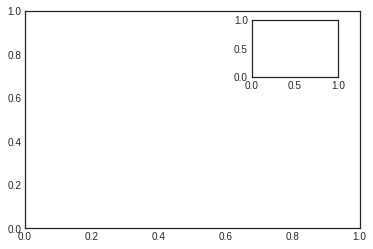

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

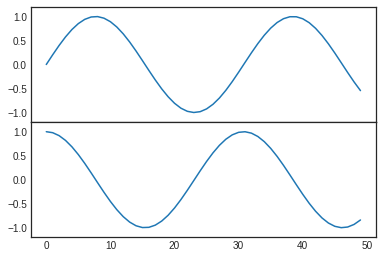

In [62]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))

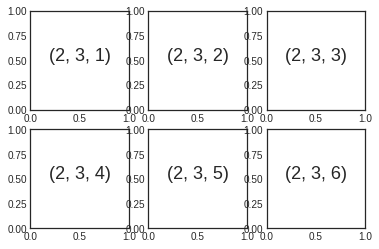

In [63]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

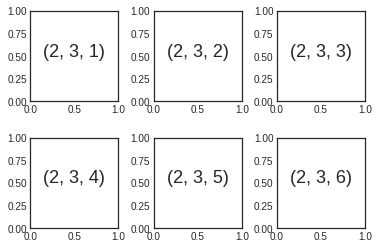

In [64]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

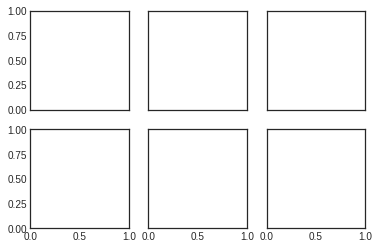

In [65]:

fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

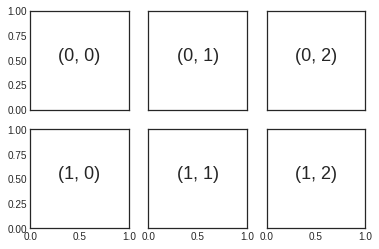

In [66]:
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

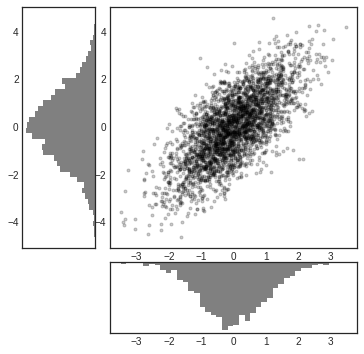

In [67]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

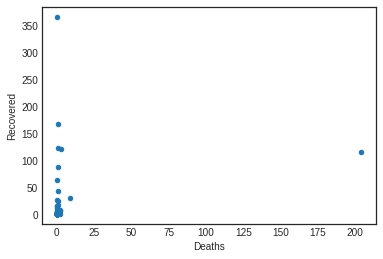

In [70]:
df_sample.plot(kind='scatter',x='Deaths',y='Recovered')

Text(0.5, 1.0, 'Frequency of Country')

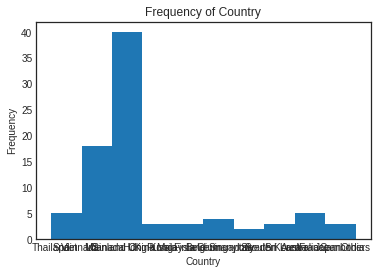

In [71]:
plt.hist(df_sample['Country'])
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.title('Frequency of Country')

Text(0.5, 1.0, 'Frequency of Recovered number')

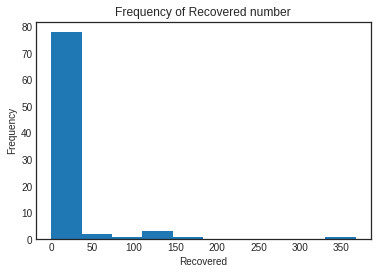

In [72]:
plt.hist(df_sample['Recovered'])
plt.xlabel('Recovered')
plt.ylabel('Frequency')
plt.title('Frequency of Recovered number')

Text(0.5, 1.0, 'Box Plot of Death count')

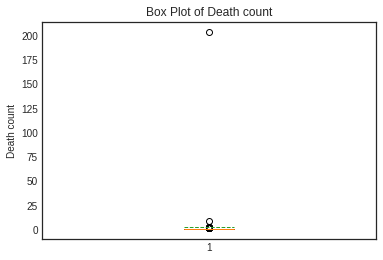

In [73]:
plt.boxplot(df_sample['Deaths'], showmeans=True, meanline=True)
plt.ylabel('Death count')
plt.title('Box Plot of Death count')